# Microstructure development

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import  GridSpec

import seaborn as sns
import os
path = os.path.abspath("..")
path_nonelastic = os.path.abspath('../Step0_phase_field_simulation/nonelastic/exodus_files/Ti_Cr_non_elastic.e')
path_elastic = os.path.abspath('../Step0_phase_field_simulation/elastic/exodus_files/Ti_Cr_elastic.e')

In [2]:
model = netCDF4.Dataset(path_nonelastic)

X_all = model.variables['coordx'][:]
Y_all = model.variables['coordy'][:]
# elem_node = model.variables['connect1'][:]
c = model.variables['vals_nod_var1'][:]

points = np.vstack([X_all,Y_all,c]).T

In [3]:
column_names = ['X', 'Y'] + list(range(c.shape[0]))

df = pd.DataFrame(points, columns=column_names)
df = df.sort_values(by = ['X', 'Y'], ascending = [True, True], ignore_index=True)
df_c = df.iloc[:, 2:]
df.head()

,X,Y,0,1,2,3,4,5,6,7,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.000,0.724541,0.793882,0.789126,0.783976,0.778358,0.770552,0.762413,0.751720,...,0.995772,1.009141,1.017431,1.022740,1.026233,1.028580,1.032321,1.033530,1.034019,1.034106
1,0.0,0.125,0.875262,0.793986,0.789763,0.784992,0.779763,0.772509,0.764970,0.755108,...,0.995622,1.009013,1.017333,1.022670,1.026184,1.028547,1.032318,1.033536,1.034028,1.034116
2,0.0,0.250,0.866308,0.794110,0.790441,0.786077,0.781270,0.774618,0.767735,0.758784,...,0.995590,1.008944,1.017268,1.022620,1.026149,1.028524,1.032318,1.033543,1.034038,1.034127
3,0.0,0.375,0.703909,0.794275,0.791147,0.787206,0.782842,0.776828,0.770640,0.762653,...,0.995675,1.008935,1.017238,1.022591,1.026127,1.028510,1.032321,1.033552,1.034049,1.034138
4,0.0,0.500,0.839194,0.794488,0.791869,0.788354,0.784447,0.779090,0.773620,0.766626,...,0.995874,1.008984,1.017242,1.022583,1.026119,1.028505,1.032327,1.033562,1.034060,1.034149


In [4]:
x_dim = int(df_c.shape[0]**0.5)
y_dim = int(df_c.shape[0]**0.5)
t_dim = int(df_c.shape[1])

npa = df_c.to_numpy().flatten().reshape(x_dim, y_dim, t_dim)
npa = np.rot90(npa)
npa.shape

(401, 401, 220)

In [5]:
cmap=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

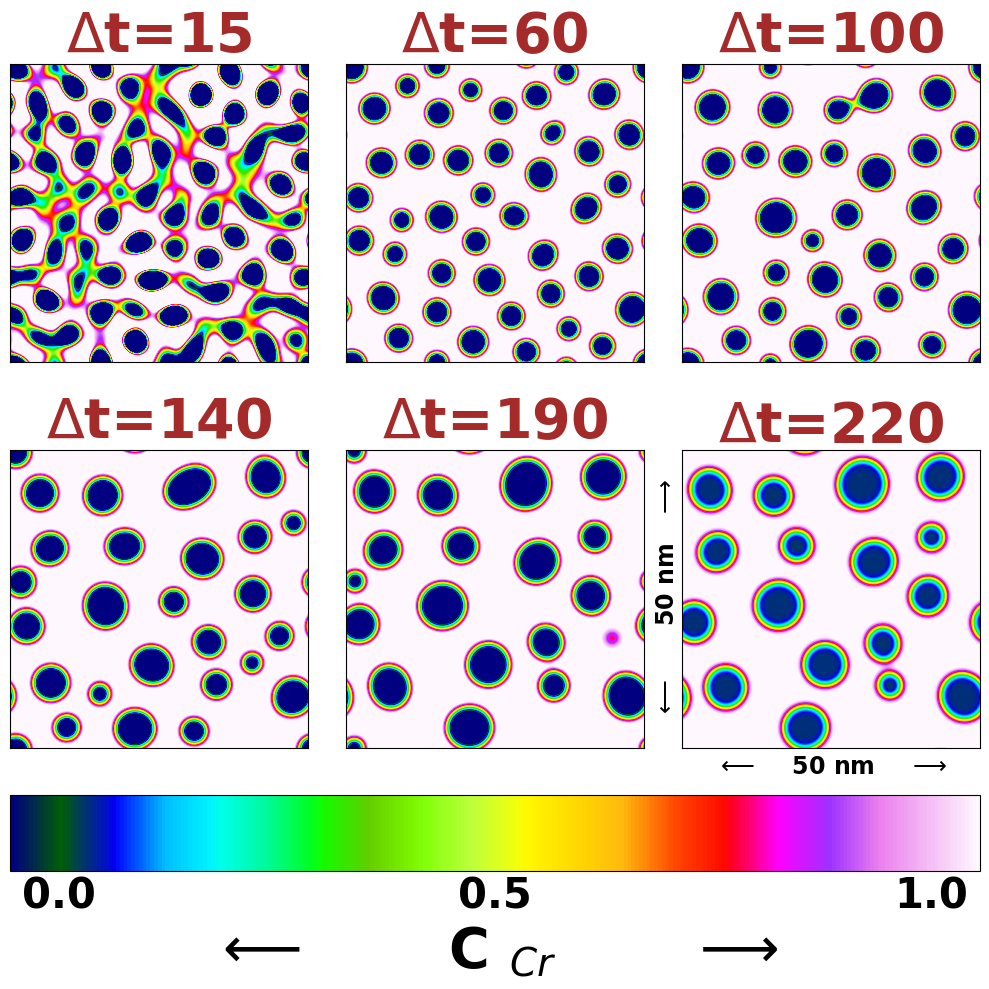

In [9]:
t = [0, 12, 60, 100, 140, 190, 219]

fig = plt.figure(figsize=(10, 10))
height_ratios = [1, 1, 0.2]
width_ratios = [1, 1, 1]
gs = GridSpec(3, 3, figure=fig, height_ratios=height_ratios, width_ratios=width_ratios)

cmap = 'gist_ncar'
ax1 = fig.add_subplot(gs[0, 0])
hmap1 = ax1.imshow(npa[:,:,t[1]], vmin = 0.75, vmax = 0.85,  cmap=cmap)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax2 = fig.add_subplot(gs[0, 1])
hmap2 = ax2.imshow(npa[:,:,t[2]], vmin = 0.3, vmax = 0.9,  cmap=cmap)
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax3 = fig.add_subplot(gs[0, 2])
hmap3 = ax3.imshow(npa[:,:,t[3]], vmin = 0.25, vmax = 0.9,  cmap=cmap)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax4 = fig.add_subplot(gs[1, 0])
hmap4 = ax4.imshow(npa[:,:,t[4]], vmin = 0.2, vmax = 0.95,  cmap=cmap)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax5 = fig.add_subplot(gs[1, 1])
hmap5 = ax5.imshow(npa[:,:,t[5]], vmin = 0.15, vmax = 0.95,  cmap=cmap)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax6 = fig.add_subplot(gs[1, 2])
hmap6 = ax6.imshow(npa[:,:,t[6]], vmin = 0.0, vmax = 1.0,  cmap=cmap)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


cax = fig.add_subplot(gs[2, :])
cbar = plt.colorbar(hmap6, orientation='horizontal', cax=cax, pad=0.05,)
cbar.set_ticks([0.05, 0.5, 0.95],labels=['0.0', '0.5', '1.0'], weight='bold',) 
cbar.ax.tick_params(labelsize=30,length=0) 
cbar.set_label('$\longleftarrow$       C $_{Cr}$       $\longrightarrow$',  labelpad=5, fontsize=40, rotation=00, weight='bold')

ax6.set_xlabel('$\longleftarrow$    50 nm    $\longrightarrow$', fontsize = 17, weight ='bold', labelpad=5, color='k')
ax6.annotate('$\longleftarrow$      50 nm   $\longrightarrow$', xy=(1, 0.5), xytext=(-0.05, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 17, weight = 'bold', ha='center', va='center', color='k',)

t = [0, 12, 60, 100, 140, 190, 219]
ax1.set_title(r'$\Delta$t'+f'={t[1]+3}', fontsize=40, weight ='bold', color ='brown')
ax2.set_title(r'$\Delta$t'+f'={t[2]}',   fontsize=40, weight ='bold', color ='brown')
ax3.set_title(r'$\Delta$t'+f'={t[3]}',   fontsize=40, weight ='bold', color ='brown')
ax4.set_title(r'$\Delta$t'+f'={t[4]}',   fontsize=40, weight ='bold', color ='brown')
ax5.set_title(r'$\Delta$t'+f'={t[5]}',   fontsize=40, weight ='bold', color ='brown')
ax6.set_title(r'$\Delta$t'+f'={t[6]+1}', fontsize=40, weight ='bold', color ='brown')

plt.tight_layout()
plt.savefig('figures/combo.png', transparent=True)

plt.show()

## Individual

In [7]:
t = [15, 75, 150, 219]

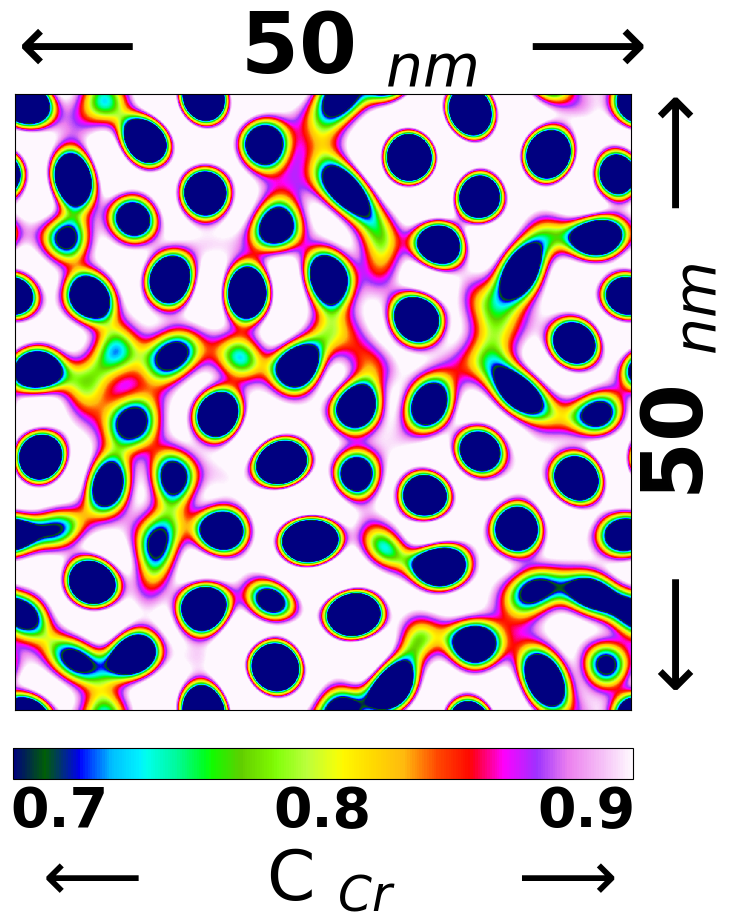

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=[8, 10]) #figsize=[8, 10])
hmap1 = ax1.imshow(npa[:,:,t[0]], vmin = 0.7, vmax = 0.9,  cmap='gist_ncar')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, orientation='horizontal', ax=[ax1], pad=0.05)
cbar.set_ticks([0.715, 0.8, 0.885],labels=['0.7', '0.8', '0.9'], weight='bold',) 
cbar.ax.tick_params(labelsize=40,length=0) 
cbar.set_label('$\longleftarrow$     C $_{Cr}$     $\longrightarrow$',  labelpad=5, fontsize=50, rotation=00)
ax1.set_xlabel('$\longleftarrow$   50 $_{nm}$ $\longrightarrow$', fontsize = 60, weight ='bold', labelpad=15)
ax1.xaxis.set_label_position('top')
ax1.annotate('$\longleftarrow$  50 $_{nm}$ $\longrightarrow$', xy=(1, 0.5), xytext=(1.08, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 60, weight = 'bold',
             color='k', ha='center', va='center')

plt.savefig('figures/t15.png', transparent=True)
plt.show()

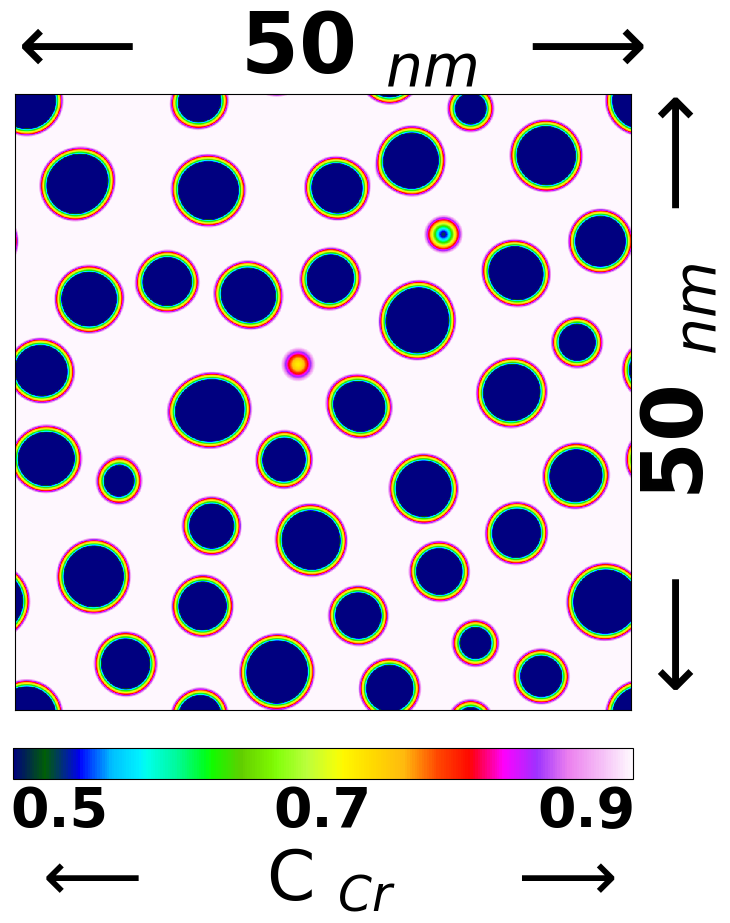

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=[8, 10]) #figsize=[8, 10])
hmap2 = ax1.imshow(npa[:,:,t[1]], vmin = 0.5, vmax = 0.9,  cmap='gist_ncar')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, orientation='horizontal', ax=[ax1], pad=0.05)
cbar.set_ticks([0.53, 0.7, 0.87],labels=['0.5', '0.7', '0.9'], weight='bold',)
cbar.ax.tick_params(labelsize=40,length=0) 
cbar.set_label('$\longleftarrow$     C $_{Cr}$     $\longrightarrow$',  labelpad=5, fontsize=50, rotation=00)
ax1.set_xlabel('$\longleftarrow$   50 $_{nm}$ $\longrightarrow$', fontsize = 60, weight ='bold', labelpad=15)
ax1.xaxis.set_label_position('top')
ax1.annotate('$\longleftarrow$  50 $_{nm}$ $\longrightarrow$', xy=(1, 0.5), xytext=(1.08, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 60, weight = 'bold',
             color='k', ha='center', va='center')

plt.savefig('figures/t75.png', transparent=True)

plt.show()

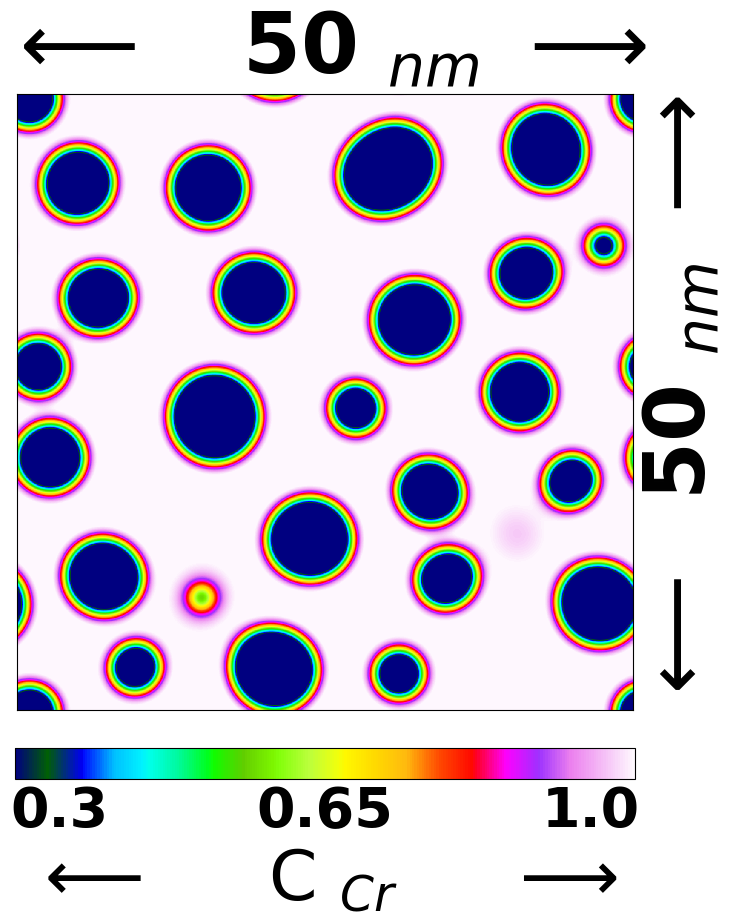

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=[8, 10]) #figsize=[8, 10])
hmap2 = ax1.imshow(npa[:,:,t[2]], vmin = 0.3, vmax = 1.0,  cmap='gist_ncar')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, orientation='horizontal', ax=[ax1], pad=0.05)
cbar.set_ticks([0.35, 0.65, 0.95],labels=['0.3', '0.65', '1.0'], weight='bold',)
cbar.ax.tick_params(labelsize=40,length=0) 
cbar.set_label('$\longleftarrow$     C $_{Cr}$     $\longrightarrow$',  labelpad=5, fontsize=50, rotation=00)
ax1.set_xlabel('$\longleftarrow$   50 $_{nm}$ $\longrightarrow$', fontsize = 60, weight ='bold', labelpad=15)
ax1.xaxis.set_label_position('top')
ax1.annotate('$\longleftarrow$  50 $_{nm}$ $\longrightarrow$', xy=(1, 0.5), xytext=(1.08, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 60, weight = 'bold',
             color='k', ha='center', va='center')

# plt.savefig('figures/t150.png', transparent=True)

plt.show()

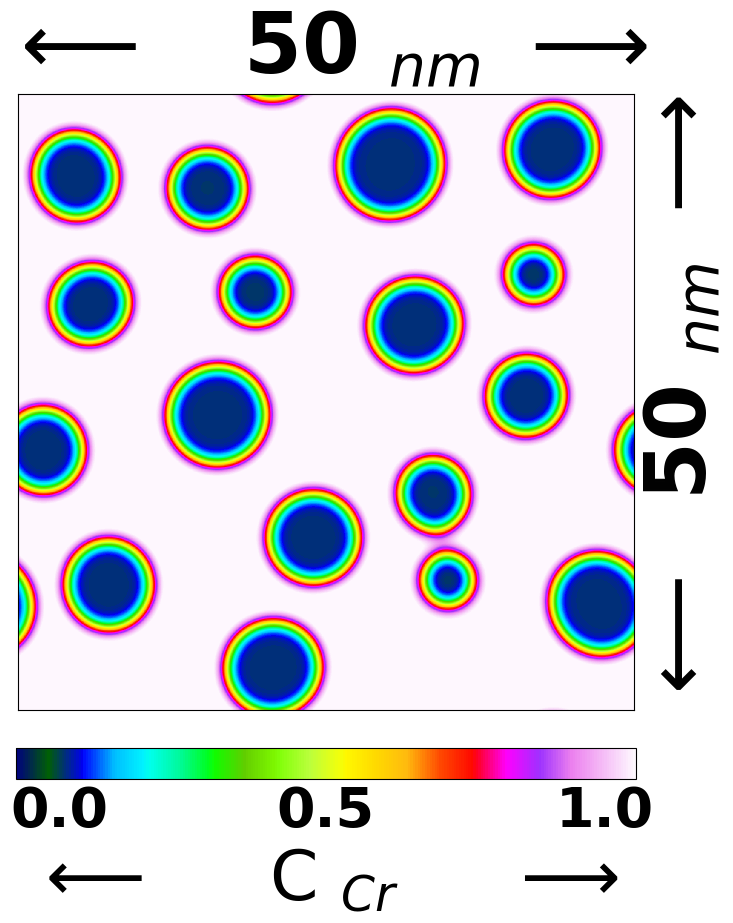

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=[8, 10]) #figsize=[8, 10])
hmap1 = ax1.imshow(npa[:,:,t[3]], vmin = 0.0, vmax = 1.0,  cmap='gist_ncar')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, orientation='horizontal', ax=[ax1], pad=0.05)
cbar.set_ticks([0.07, 0.5, 0.95],labels=['0.0', '0.5', '1.0'], weight='bold',) 
cbar.ax.tick_params(labelsize=40,length=0) 
cbar.set_label('$\longleftarrow$     C $_{Cr}$     $\longrightarrow$',  labelpad=5, fontsize=50, rotation=00)
ax1.set_xlabel('$\longleftarrow$   50 $_{nm}$ $\longrightarrow$', fontsize = 60, weight ='bold', labelpad=15)
ax1.xaxis.set_label_position('top')
ax1.annotate('$\longleftarrow$  50 $_{nm}$ $\longrightarrow$', xy=(1, 0.5), xytext=(1.08, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 60, weight = 'bold',
             color='k', ha='center', va='center')

plt.savefig('figures/t220.png', transparent=True)

plt.show()

## Gibbs Free Energy

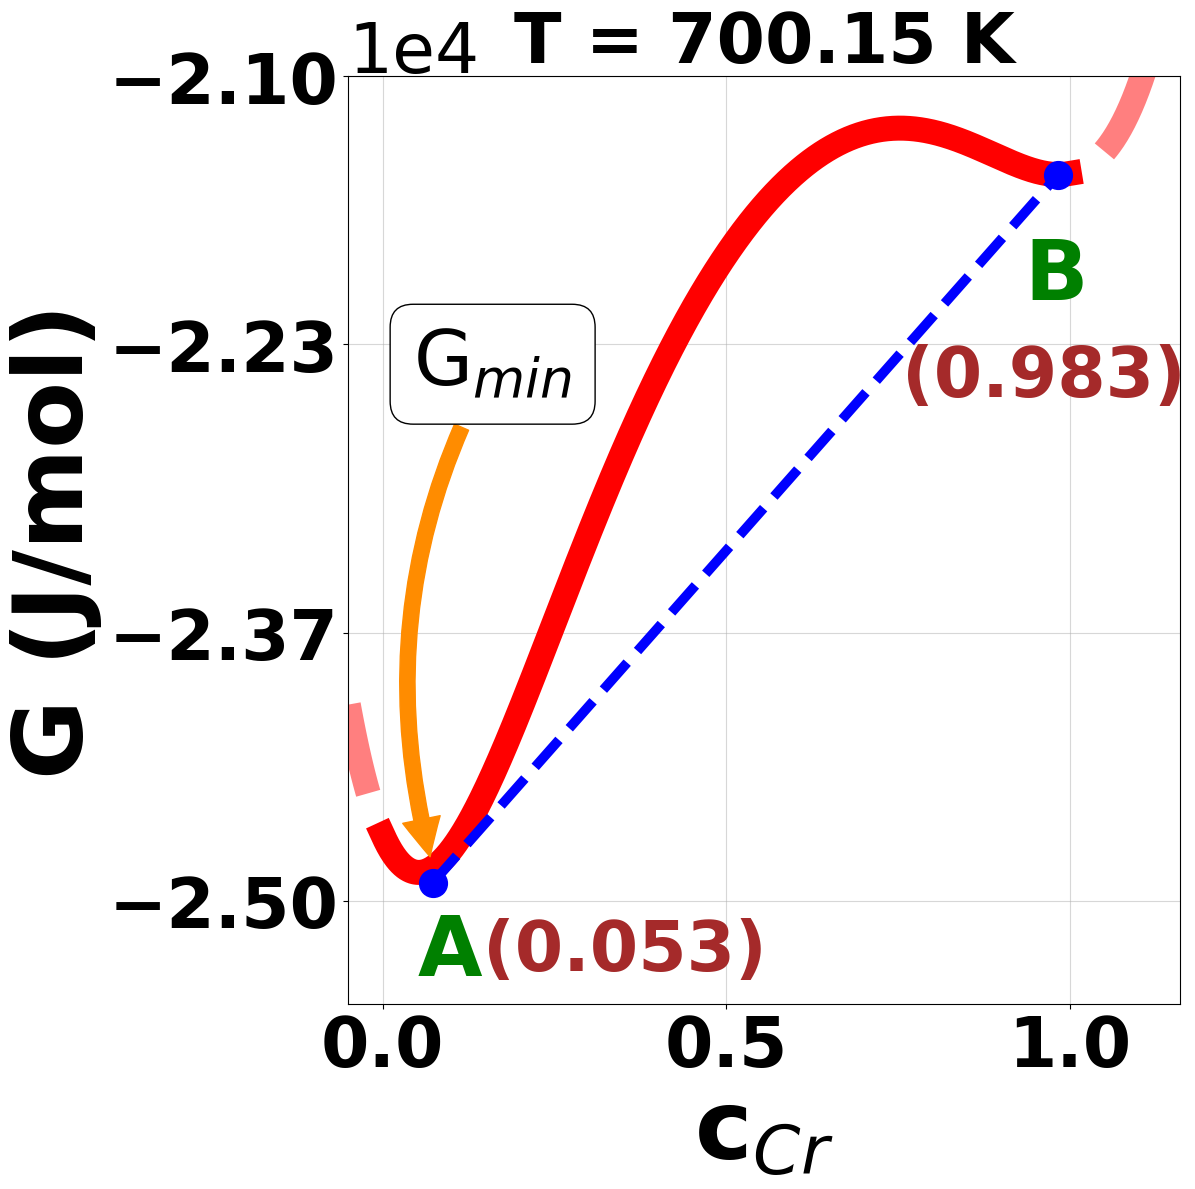

In [12]:
X = np.arange(0.0, 1.0, 0.001) 

A, B, C, D, E, xe, Th = -2.8245, 0.60298, 146.641, -2.1577,0.5918, 0.3362, 1e4

G_FCC= Th *(A*(E*X - xe)**2 + B*(E*X - xe) + C*(E*X - xe)**6 + D)

plt.rcParams["figure.figsize"]=(12, 12)
plt.plot(X, G_FCC, '-', color='red', linewidth=18)
# plt.legend(loc=4, prop={'size': 15})
plt.grid(alpha=0.5)
plt.title("T = 700.15 K",fontsize=50, pad= 0, weight='bold')
plt.xticks(fontsize=50, weight='bold')
plt.xlabel("c$_{Cr}$",fontsize=70, weight='bold')
plt.yticks(fontsize=50, weight='bold')
plt.ylabel("G (J/mol)",fontsize=70, weight='bold')
plt.xlim(-0.05,1.16)
plt.ylim(-25500,-21000) 
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0),useMathText=False, )

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(3))

plt.gca().yaxis.offsetText.set_fontsize(50)
plt.xticks([0.0, 0.5, 1.0])
plt.yticks([-2.1e4, -2.23e4, -2.37e4,-2.5e4])

point1 = [X[np.argmin(G_FCC)], min(G_FCC)]
point2 = [X[800+np.argmin(G_FCC[800:1000])], min(G_FCC[800:1000])]
x_values = [point1[0]+0.02, point2[0]]
y_values = [point1[1]-50, point2[1]]
plt.text(point1[0]*0.95, point1[1]*1.02, "A", fontsize=60, color='g', weight='bold')
plt.text(point1[0]*2.75, point1[1]*1.019, f"({X[np.argmin(G_FCC)]:.3f})", fontsize=50, color='brown', weight='bold')
plt.text(point2[0]*0.95, point2[1]*1.028, "B", fontsize=60, color='g', weight='bold')
plt.text(point2[0]*0.768, point2[1]*1.05, f"({X[800+np.argmin(G_FCC[800:1000])]:.3f})", fontsize=50, color='brown', weight='bold')

plt.plot(x_values, y_values, 'o', linestyle="--", linewidth=7, markersize=20, color='b')

plt.annotate('G$_{min}$', horizontalalignment='center',
             xy = (0.07, -24800),
             xytext = (0.16, -22500),
             bbox=dict(boxstyle="round", fc="w",),
             arrowprops=dict(arrowstyle='simple', color='darkorange', fc='darkorange', connectionstyle='arc3, rad=0.2'),
            fontsize=55, )



X_0 = np.arange(-0.05, -0.02, 0.001) 
X_1 = np.arange(1.05, 1.2, 0.001) 

G_FCC_0 = Th *(A*(E*X_0 - xe)**2 + B*(E*X_0 - xe) + C*(E*X_0 - xe)**6 + D)
G_FCC_1 = Th *(A*(E*X_1 - xe)**2 + B*(E*X_1 - xe) + C*(E*X_1 - xe)**6 + D)

plt.plot(X_0, G_FCC_0, '--', color='red', linewidth=18, alpha=0.5)
plt.plot(X_1, G_FCC_1, '--', color='red', linewidth=18, alpha=0.5)


plt.tight_layout()

plt.savefig('figures/Gibbs_curve.png', transparent=True)
plt.show()

## Area of Phase

In [38]:
df = pd.read_csv('Ti-Cr_Elastic_out.csv')
df.tail()

,time,active_time,area_h,evaluations,iterations,nodes,step_size,von_mises
87,252.929688,12056.822564,2309.557324,8353,48,160801,0.976562,124.666577
88,253.906250,12201.966924,2305.385471,8453,46,160801,0.976562,126.955677
89,254.882812,12341.526989,2301.213472,8548,41,160801,0.976562,129.223483
90,255.859375,12477.676806,2297.044208,8642,40,160801,0.976562,131.468326
91,256.835938,12611.236840,2292.880515,8733,37,160801,0.976562,133.688608


In [36]:
time = np.array(df['time'])
area = np.array(df['area_h'])

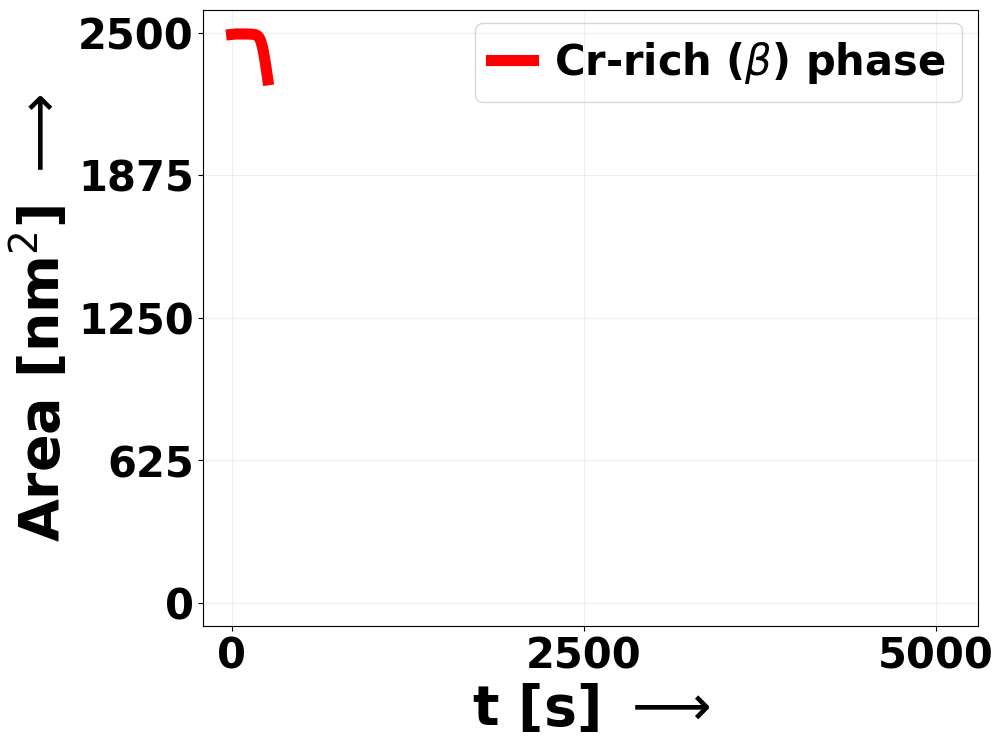

In [37]:
fig = plt.figure(figsize=(10, 8))
plt.plot(time, area,  linewidth=8, linestyle='-', color = 'red', label =r'Cr-rich ($\beta$) phase')

plt.grid(alpha=0.2)
# plt.title("Temporal Evolution of Phase Area",fontsize=30, pad= 0, weight='bold')
plt.xticks(fontsize=30, weight='bold')
plt.xlabel("t [s] $\longrightarrow$",fontsize=40, weight='bold')
plt.yticks(fontsize=30, weight='bold')
plt.ylabel(r"Area [nm$^2$] $\longrightarrow$",fontsize=40, weight='bold')
plt.xlim(-200,5300)
plt.ylim(-100,2600) 
plt.yticks([0, 625, 1250, 1875, 2500], labels=['0', '625', '1250', '1875', '2500'], size=30, color='k' )
plt.xticks([0, 2500, 5000], labels=['0', '2500', '5000'], size=30, color='k' )

legend = plt.legend(loc=(0.35, 0.85), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, handletextpad=0.5, handlelength=1.0,   frameon=True).get_frame().set_facecolor('none')

# plt.tight_layout()
plt.savefig('figures/Phase_Area.png', transparent=True)

plt.show()